In [27]:
# Install the necessary packages if not installed
#if (!requireNamespace("BiocManager", quietly = TRUE))
    #install.packages("BiocManager")
#BiocManager::install("Biostrings")
#BiocManager::install("ShortRead")
#install.packages("ape")
#install.packages("kableExtra")
#install.packages("IRdisplay")
#install.packages("randomForest")
#install.packages("caret")
#install.packages("readr")
#install.packages("flextable")

In [28]:
install.packages("sf", type = "source")
install.packages("terra", type = "source")
install.packages("rnaturalearth")
install.packages("rnaturalearth")
install.packages("countrycode")

Installing package into '/opt/homebrew/lib/R/4.4/site-library'
(as 'lib' is unspecified)

Warning message in install.packages("sf", type = "source"):
"installation of package 'sf' had non-zero exit status"
Installing package into '/opt/homebrew/lib/R/4.4/site-library'
(as 'lib' is unspecified)

Warning message in install.packages("terra", type = "source"):
"installation of package 'terra' had non-zero exit status"
Installing package into '/opt/homebrew/lib/R/4.4/site-library'
(as 'lib' is unspecified)

also installing the dependencies 'sf', 'terra'


Warning message in install.packages("rnaturalearth"):
"installation of package 'sf' had non-zero exit status"
Warning message in install.packages("rnaturalearth"):
"installation of package 'terra' had non-zero exit status"
Warning message in install.packages("rnaturalearth"):
"installation of package 'rnaturalearth' had non-zero exit status"
Installing package into '/opt/homebrew/lib/R/4.4/site-library'
(as 'lib' is unspecified)

also inst

In [29]:
library(ggtree)
library(ape)
library(BiocManager)
library(dplyr)
library(stringr)
library(tidyverse)
library(IRdisplay)
library(readr)
library(caret)
library(randomForest)
library(flextable)
library(tibble)
library(ggplot2)
library (pheatmap)


ERROR: Error: package or namespace load failed for 'flextable' in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/opt/homebrew/lib/R/4.4/site-library/xml2/libs/xml2.so':
  dlopen(/opt/homebrew/lib/R/4.4/site-library/xml2/libs/xml2.so, 0x0006): Library not loaded: /opt/homebrew/opt/icu4c/lib/libicui18n.74.dylib
  Referenced from: <4330AE63-F3B2-3C9D-AB40-AD1BCC3CE18E> /opt/homebrew/Cellar/libxml2/2.12.8/lib/libxml2.2.dylib
  Reason: tried: '/opt/homebrew/opt/icu4c/lib/libicui18n.74.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/icu4c/lib/libicui18n.74.dylib' (no such file), '/opt/homebrew/opt/icu4c/lib/libicui18n.74.dylib' (no such file), '/opt/homebrew/Cellar/r/4.4.2_2/lib/R/lib/libicui18n.74.dylib' (no such file), '/opt/homebrew/Cellar/icu4c@76/76.1_1/lib/libicui18n.74.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/Cellar/icu4c@76/76.1_1/lib/libicui18n.74.dylib' (no such file), '/opt/homebrew/Cellar/icu4c@76/76.1_1/lib/libicui18n.74.dylib' (no such file), '/opt/homebrew/Cellar/r/4.4.2_2/lib/R/lib/libicui18n.


In [30]:
# Read  DENV_SL_2016-2023 master data sheet
data <- read.csv("/Users/dinukaariyaratne/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PhD USJP/PhD_Thesis/Results/DENV2_SL_2016-2023.csv")
head(data)



,X...Sample_name,Date_collected,Diagnosis,Dengue_serotype,Age,Gender,Dengue_status,Rash,Abdominal_pain,Vomiting,...,X.15,X.16,X.17,X.18,X.19,X.20,X.21,X.22,X.23,X.24
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,S36,16-Jul,DF,DEN2,39,M,Secondary,N,N,Y,...,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,,
2,TG9,"Jan 15, 2017",DF,DEN2,54,F,,N,N,Y,...,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,,
3,TG10,"Jan 15, 2017",DF,DEN2,40,F,,N,N,N,...,NS1:Q131H,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,
4,TG11,"Jan 16, 2017",DF,DEN2,22,F,,N,N,N,...,NS1:Q131H,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,
5,TG33,"Feb 03, 2017",DF,DEN2,29,M,,N,N,Y,...,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,,
6,TG39,"Feb 07, 2017",DF,DEN2,37,F,,N,N,Y,...,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,,,,,


In [32]:

## 1) Basic summary statistics
num_male    <- sum(data$Gender == "M", na.rm = TRUE)
num_female  <- sum(data$Gender == "F", na.rm = TRUE)
num_DF      <- sum(data$Diagnosis == "DF", na.rm = TRUE)
num_DHF     <- sum(data$Diagnosis == "DHF", na.rm = TRUE)

## 2) Convert columns to numeric if needed and compute median
median_HPCV       <- median(as.numeric(data$Highest_PCV), na.rm = TRUE)
median_LPlatelets <- median(as.numeric(data$Lowest_Platelets.10.6), na.rm = TRUE)
median_LWBC       <- median(as.numeric(data$Lowest_WBC), na.rm = TRUE)

## 3) Age summaries by gender
lowest_male_age    <- min(as.numeric(data$Age[data$Gender == "M"]), na.rm = TRUE)
highest_male_age   <- max(as.numeric(data$Age[data$Gender == "M"]), na.rm = TRUE)
median_male_age    <- median(as.numeric(data$Age[data$Gender == "M"]), na.rm = TRUE)

lowest_female_age  <- min(as.numeric(data$Age[data$Gender == "F"]), na.rm = TRUE)
highest_female_age <- max(as.numeric(data$Age[data$Gender == "F"]), na.rm = TRUE)
median_female_age  <- median(as.numeric(data$Age[data$Gender == "F"]), na.rm = TRUE)

## 4) Diagnosis‐specific medians for Highest_PCV, Lowest_Platelets, Lowest_WBC
median_DF_HPCV <- median(
  as.numeric(data$Highest_PCV[data$Diagnosis == "DF"]), 
  na.rm = TRUE
)
median_DF_LPlatelets <- median(
  as.numeric(data$Lowest_Platelets.10.6[data$Diagnosis == "DF"]),
  na.rm = TRUE
)
median_DF_LWBC <- median(
  as.numeric(data$Lowest_WBC[data$Diagnosis == "DF"]),
  na.rm = TRUE
)

median_DHF_HPCV <- median(
  as.numeric(data$Highest_PCV[data$Diagnosis == "DHF"]), 
  na.rm = TRUE
)
median_DHF_LPlatelets <- median(
  as.numeric(data$Lowest_Platelets.10.6[data$Diagnosis == "DHF"]),
  na.rm = TRUE
)
median_DHF_LWBC <- median(
  as.numeric(data$Lowest_WBC[data$Diagnosis == "DHF"]),
  na.rm = TRUE
)

## 5) Gather all E:/NS1: mutation entries into long format 
##    here we assume the first 20 columns are clinical data
##    and columns 21..end are the mutation columns. Adjust as needed.
mutation_long <- data %>%
  select(-1:-20) %>%                    # Keep only columns from 21 onward
  pivot_longer(
    cols = everything(),
    names_to = "auto_colname",          # old column names if they have any
    values_to = "mutation",
    values_drop_na = FALSE
  ) %>%
  # Identify region = "E" or "NS1" if the cell starts with E: or NS1:
  mutate(
    region = case_when(
      str_detect(mutation, "^E:")   ~ "E",
      str_detect(mutation, "^NS1:") ~ "NS1",
      TRUE                          ~ NA_character_
    )
  )

## 6) Count frequencies of each mutation where region is not NA
freq_table <- mutation_long %>%
  filter(!is.na(region)) %>%
  count(region, mutation, sort = TRUE)

## 7) Totals by region (E vs NS1)
total_E   <- sum(freq_table$n[freq_table$region == "E"])
total_NS1 <- sum(freq_table$n[freq_table$region == "NS1"])

## 8) Assemble final summary into a single‐row tibble
summary_table <- tibble(
  # Basic counts
  num_male           = num_male,
  num_female         = num_female,
  num_DF             = num_DF,
  num_DHF            = num_DHF,
  
  # Overall medians
  median_Highest_PCV = median_HPCV,
  median_Lowest_Plt  = median_LPlatelets,
  median_Lowest_WBC  = median_LWBC,
  
  # Age summaries by gender
  lowest_male_age    = lowest_male_age,
  highest_male_age   = highest_male_age,
  median_male_age    = median_male_age,
  lowest_female_age  = lowest_female_age,
  highest_female_age = highest_female_age,
  median_female_age  = median_female_age,
  
  # Diagnosis‐Specific median values
  median_DF_HPCV        = median_DF_HPCV,
  median_DF_LowPlatelet = median_DF_LPlatelets,
  median_DF_LWBC        = median_DF_LWBC,
  median_DHF_HPCV       = median_DHF_HPCV,
  median_DHF_LowPlatelet= median_DHF_LPlatelets,
  median_DHF_LWBC       = median_DHF_LWBC,
  
  # Add total E and NS1 mutations found
  total_E               = total_E,
  total_NS1             = total_NS1
)

## 9) Print out the main summaries (wide format)
summary_table

## 10) Transpose the summary table if you prefer a tall format
transposed_table <- summary_table %>%
  as.data.frame() %>%   # Convert tibble → data frame so that t() works nicely
  t() %>%               # Transpose
  as.data.frame() %>%   # back to data frame
  rownames_to_column(var = "Parameter") %>%
  rename(Value = V1)

transposed_table

## 11) Print the frequency of each specific mutation
freq_table

num_male,num_female,num_DF,num_DHF,median_Highest_PCV,median_Lowest_Plt,median_Lowest_WBC,lowest_male_age,highest_male_age,median_male_age,...,highest_female_age,median_female_age,median_DF_HPCV,median_DF_LowPlatelet,median_DF_LWBC,median_DHF_HPCV,median_DHF_LowPlatelet,median_DHF_LWBC,total_E,total_NS1
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
34,14,39,9,44,NA,2.89,15,66,23.5,...,61,37.5,43,NA,2.7,46,NA,3,531,592


Parameter,Value
<chr>,<dbl>
num_male,34.00
num_female,14.00
num_DF,39.00
num_DHF,9.00
median_Highest_PCV,44.00
median_Lowest_Plt,NA
median_Lowest_WBC,2.89
lowest_male_age,15.00
highest_male_age,66.00


region,mutation,n
<chr>,<chr>,<int>
E,E:E71A,48
E,E:I462V,48
E,E:I484V,48
E,E:M6I,48
E,E:N390S,48
E,E:Q52H,48
E,E:T478S,48
E,E:V129I,48
NS1,NS1:F178S,48


In [33]:
#Generate dataset with sample names with a matrix of the E and NS1 mutations and presence and absence of mutations for each sample.

presence_absence <- data %>%
  # 1) Keep only the sample column and the unlabeled “mutation” columns
  select(
    X...Sample_name,
    21:ncol(.)   
  ) %>%
  # 2) Pivot from wide to long.
  #    The old column names (like X21, X22...) go into "column_index" (not really used),
  #    and the cell contents (the actual mutation strings "E:Q52H", "NS1:S80T", etc.)
  #    go into "mutation_value".
  pivot_longer(
    cols       = -X...Sample_name,
    names_to   = "column_index",
    values_to  = "mutation_value"
  ) %>%
  # 3) Remove empty/NA rows so that only real mutations remain
  filter(!is.na(mutation_value), mutation_value != "") %>%
  # 4) Retain distinct (sample, mutation_value) pairs, marking presence = 1
  distinct(X...Sample_name, mutation_value) %>%
  mutate(value = 1) %>%
  # 5) Pivot back to wide so each unique mutation string becomes a column
  pivot_wider(
    names_from  = mutation_value,
    values_from = value,
    values_fill = 0
  )

# Inspect your resulting presence/absence matrix
presence_absence

X...Sample_name,E:M6I,E:Q52H,E:E71A,E:R120T,E:V129I,E:H149N,E:I164V,E:N390S,E:I462V,...,NS1:N10S,E:V309M,NS1:S128P,NS1:T164M,NS1:K116R,E:T176I,NS1:N191D,NS1:Q253H,E:W453C,NS1:F279L
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S36,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TG9,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TG10,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TG11,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TG33,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TG39,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
TG40,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TG41,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TG45,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
library(tibble)

# Save the sample names
row_names <- presence_absence$X...Sample_name

# Convert the rest to a matrix
mutation_matrix <- presence_absence %>%
  select(-X...Sample_name) %>%
  as.data.frame() %>%
  as.matrix()

# Assign row names
rownames(mutation_matrix) <- row_names




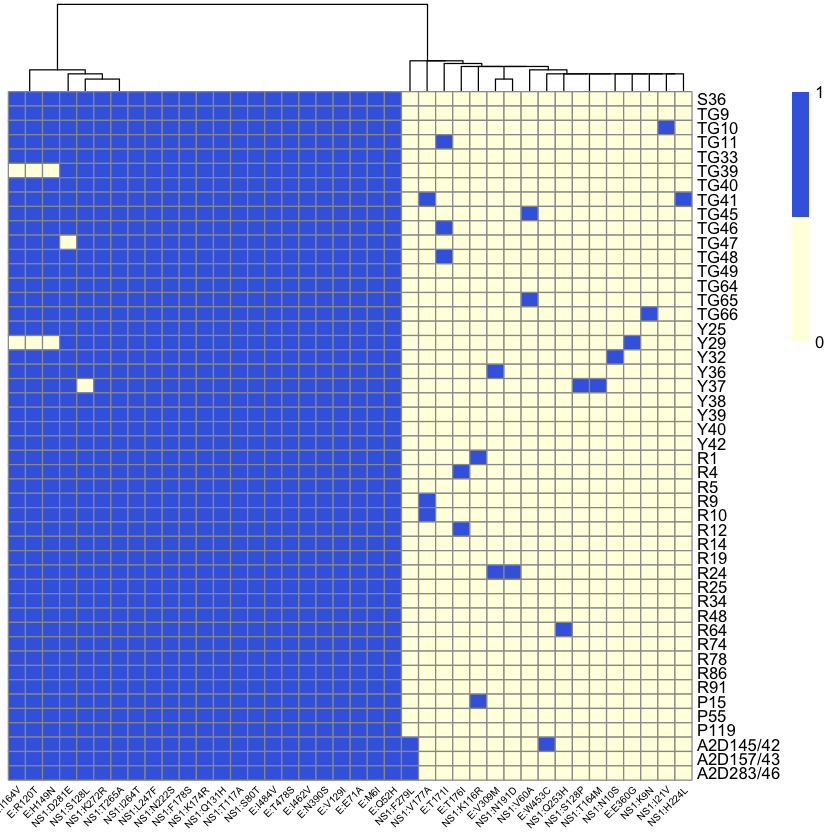

In [35]:
library(pheatmap)



pheatmap(
  mutation_matrix,
  cluster_rows   = FALSE,
  cluster_cols   = TRUE,
  legend         = TRUE,
  show_rownames  = TRUE,
  show_colnames  = TRUE,
  fontsize_col   = 6,
  angle_col      = 45,
  color          = c("lightyellow", "royalblue"),
  breaks         = c(0, 0.5, 1),
  legend_breaks  = c(0, 1),
  legend_labels  = c("0", "1")
)




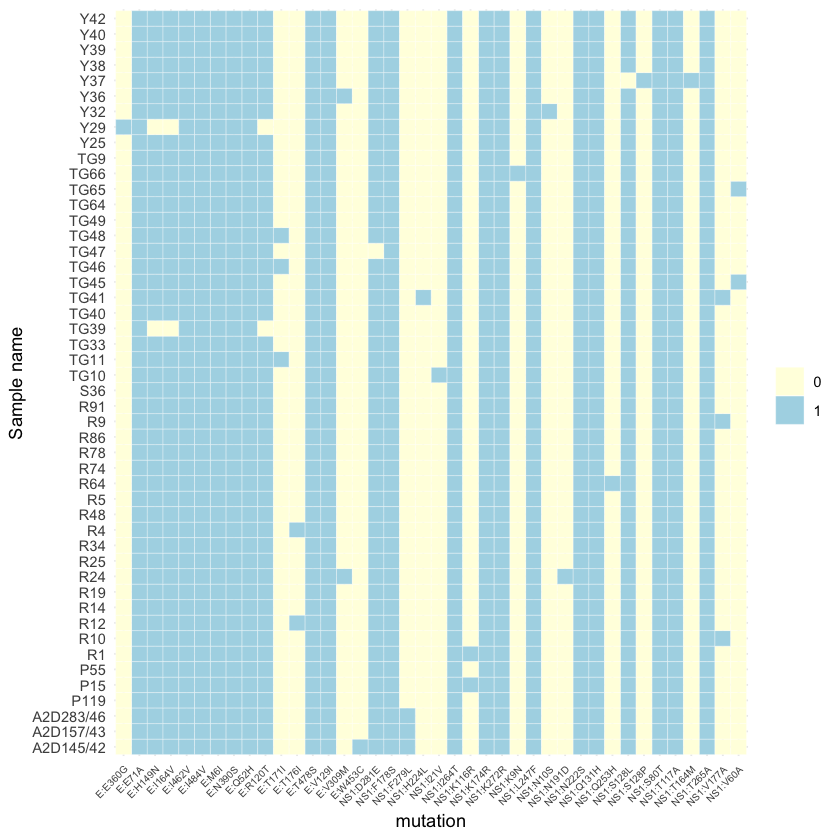

In [58]:
#alternate heatmap 
library(ggplot2)

# Convert matrix back to a long data frame: 
long_data <- presence_absence %>%
  pivot_longer(
    cols = -X...Sample_name,
    names_to = "mutation",
    values_to = "present"
  )

# Then plot:
mutations_heatmap <- ggplot(long_data, aes(x = mutation, y = X...Sample_name, fill = factor(present))) +
  geom_tile(color = "white") +
  scale_fill_manual(values = c("0" = "lightyellow", "1" = "lightblue")) +
  theme_minimal() +
  theme(
     axis.text.x = element_text(angle = 45, hjust = 1, size = 6)
  ) +
  labs(y="Sample name", fill = "")

  ggsave(filename = "/Users/dinukaariyaratne/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PhD USJP/PhD_Thesis/DENV2 paper/Figure2.tiff",  plot = mutations_heatmap, dpi = 1200, width = 6, height = 6, units = "in")

print(mutations_heatmap)

In [47]:
df_meta <- read.csv(
  "/Users/dinukaariyaratne/Downloads/nextclade (6).csv",
  sep = ";",
  header = FALSE,
  stringsAsFactors = FALSE
)

##################################################
# 2) Parse out the date into a new column "Date"
##################################################
df_meta$Date <- sapply(df_meta$V1, function(x) {
  # Split on semicolon => c("sample_number", "YYYY-MM-DD/1-XXXXX |Country|...")
  split_semicolon <- strsplit(x, ";")[[1]]
  
  # The second part (index [2]) has the date at the start, e.g. "2008-06-17/1-10708 |Brazil|..."
  remainder <- trimws(split_semicolon[2])  # trim leading/trailing whitespace
  
  
  # Split by space to isolate "2008-06-17/1-10708"
  first_token <- strsplit(remainder, "\\s+")[[1]][1]
  
  # Split on slash => c("2008-06-17", "1-10708")
  date_val <- strsplit(first_token, "/")[[1]][1]
  
  return(date_val)
})
df_meta$Date <- sub("/.*", "", df_meta[[2]])
head(df_meta)
#save as a .csv
write.csv(df_meta, 
          file = "/Users/dinukaariyaratne/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PhD USJP/PhD_Thesis/DENV2 paper/metadata_DENV2.csv", 
          row.names = FALSE)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,index,seqName,clade,qc.overallScore,qc.overallStatus,totalSubstitutions,totalDeletions,totalInsertions,totalFrameShifts,totalMissing,...,totalAminoacidSubstitutions,totalAminoacidDeletions,totalAminoacidInsertions,totalUnknownAa,alignmentScore,alignmentStart,alignmentEnd,coverage,isReverseComplement,seqName
2,0,2000/1-10679 |Venezuela|FJ898466.1,2III_D,0,good,709,0,1,0,0,...,88,0,0,0,29192,23,10700,0.9958034132239112,false,2000
3,1,2008-06-17/1-10708 |Brazil|KP188550.1,2III_C,2.477709,good,745,0,41,0,0,...,97,0,0,0,29003,1,10667,0.9947775809008672,false,2008-06-17
4,2,2015-12-30/1-10724 |China|MN018365.1,2II_F.1.1,60.984654,mediocre,841,5,6,1,0,...,116,2,0,1,28769,1,10723,1,false,2015-12-30
5,3,2014/1-10648 |Ecuador|KY474331.1,2III_D.3,0,good,750,0,2,0,0,...,91,0,0,0,28926,23,10668,0.9926326587708664,false,2014
6,4,2014/1-10648 |Ecuador|KY474315.1,2III_D.3,0,good,749,0,2,0,0,...,92,0,0,0,28930,23,10668,0.9928191737386926,false,2014


In [48]:
# 1) Read CSV (ensure stringsAsFactors = FALSE to keep text columns as character)
dengue_df <- read.csv(
  "/Users/dinukaariyaratne/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PhD USJP/PhD_Thesis/Results/DENV2_SL_2016-2023.csv",
  stringsAsFactors = FALSE
)

head(dengue_df)
# 2) Remove columns not used for modeling
dengue_df_clean <- dengue_df %>%
  select(
    -X...Sample_name,
    -Date_collected,
    -Dengue_serotype)
#  select only numeric columns for clustering
df_dengue_numeric <- dengue_df[, 16:18]  
#scale data as they are different
df_dengue_scaled <- scale(df_dengue_numeric)
set.seed(123)  # for reproducibility
k <- 3



# Convert cluster label to a factor for plotting
cluster_assignment <- as.factor(kmeans_result$cluster)

# Use PCA to reduce to 2D for visualization
dengue_pca <- prcomp(df_dengue_scaled, center = FALSE, scale. = FALSE)
pca_data <- as.data.frame(dengue_pca$x)

# Add cluster assignment to the PCA dataframe
pca_data$cluster <- cluster_assignment

# Plot the clusters in PCA space
ggplot(pca_data, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 2) +
  labs(title = "k-means Clustering (k=3) on Dengue Data in PCA space")
  

# 3) Convert the target variable (Diagnosis) to factor
dengue_df_clean <- dengue_df_clean %>%
  mutate(Diagnosis = factor(Diagnosis, levels = c("DF", "DHF")))

# 4) Convert binary columns (0/1) to factors
binary_cols <- c(
  "Rash", "Abdominal_pain", "Vomiting", "Diarrhoea",
  "Arthralgia", "Myalgia", "Hepatomegaly", "Bleeding",
  "E:M6I", "E:Q52H", "E:E71A", "E:R120T", "E:V129I",
  "E:H149N", "E:I164V", "E:T171I", "E:T176I", "E:V309M",
  "E:E360G", "E:N390S", "E:W453C", "E:I462V", "E:T478S",
  "E:I484V", "NS1:S80T", "NS1:T117A", "NS1:S128L", "NS1:Q131H",
  "NS1:K174R", "NS1:F178S", "NS1:N222S", "NS1:L247F", "NS1:I264T",
  "NS1:T265A", "NS1:K272R", "NS1:D281E", "NS1:I21V", "NS1:V177A",
  "NS1:H224L", "NS1:V60A", "NS1:K9N", "NS1:N10S", "NS1:S128P",
  "NS1:T164M", "NS1:K116R", "NS1:N191D", "NS1:Q253H", "NS1:F279L"
)

for (bc in binary_cols) {
  if (bc %in% colnames(dengue_df_clean)) {
    dengue_df_clean[[bc]] <- factor(dengue_df_clean[[bc]], levels = c(0, 1))
  }
}

# 5) Turn blank strings ("") into "0" in any character columns
dengue_df_clean <- dengue_df_clean %>%
  mutate(across(where(is.character), ~ ifelse(. == "", "0", .)))

# 6) Convert selected columns to numeric
#    Make sure the names below match exactly what your CSV contains.
dengue_df_clean <- dengue_df_clean %>%
  mutate(
    Age                    = as.numeric(Age),
    Highest_PCV            = as.numeric(Highest_PCV),
    Lowest_Platelets  = as.numeric(Lowest_Platelets),  # note backticks if using special chars
    Lowest_WBC             = as.numeric(Lowest_WBC),
    Highest_PCV            = as.numeric(Highest_PCV)
  )

dengue_df_clean <- dengue_df_clean %>%
  # 1) For character columns, replace blank "" with NA (optional step)
  mutate(across(where(is.character), ~ ifelse(. == "", NA, .))) %>%
  
  # 2) For character columns, replace NA with "0" (the string)
  mutate(across(where(is.character), ~ replace_na(., "0"))) %>%
  
  # 3) For numeric columns, replace NA with numeric 0
  mutate(across(where(is.numeric), ~ replace_na(., 0)))

  train_data <- train_data %>%
  select(where(~ !all(is.na(.))))  # Keep only columns not all NA

# Then remove any rows still containing NA
train_data <- na.omit(train_data)

# Do the same for test_data, to ensure same columns and no missing
test_data <- test_data %>%
  select(colnames(train_data)) %>%
  na.omit()
# Quick check on row count & distribution
cat("Number of rows:", nrow(dengue_df_clean), "\n")
cat("Diagnosis distribution:\n")
print(table(dengue_df_clean$Diagnosis))

# Only proceed if we have enough data and both DF & DHF are present
if (nrow(dengue_df_clean) < 2 || length(unique(dengue_df_clean$Diagnosis)) < 2) {
  stop("Not enough data or not both DF and DHF are present.")
}

# 8) Train/Test split (80/20)
set.seed(123)
train_index <- createDataPartition(dengue_df_clean$Diagnosis, p = 0.8, list = FALSE)
train_data <- dengue_df_clean[train_index, ]
test_data  <- dengue_df_clean[-train_index, ]

# 9) Train Random Forest
model_rf <- randomForest(
  Diagnosis ~ .,
  data = train_data,
  ntree = 500,
  importance = TRUE
)

# 10) Model evaluation
predictions <- predict(model_rf, newdata = test_data)
cm <- confusionMatrix(predictions, test_data$Diagnosis)
print(cm)

,X...Sample_name,Date_collected,Diagnosis,Dengue_serotype,Age,Gender,Dengue_status,Rash,Abdominal_pain,Vomiting,...,X.15,X.16,X.17,X.18,X.19,X.20,X.21,X.22,X.23,X.24
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,S36,16-Jul,DF,DEN2,39,M,Secondary,N,N,Y,...,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,,
2,TG9,"Jan 15, 2017",DF,DEN2,54,F,,N,N,Y,...,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,,
3,TG10,"Jan 15, 2017",DF,DEN2,40,F,,N,N,N,...,NS1:Q131H,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,
4,TG11,"Jan 16, 2017",DF,DEN2,22,F,,N,N,N,...,NS1:Q131H,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,
5,TG33,"Feb 03, 2017",DF,DEN2,29,M,,N,N,Y,...,NS1:K174R,NS1:F178S,NS1:N222S,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,,
6,TG39,"Feb 07, 2017",DF,DEN2,37,F,,N,N,Y,...,NS1:L247F,NS1:I264T,NS1:T265A,NS1:K272R,NS1:D281E,,,,,


ERROR: Error in eval(expr, envir, enclos): object 'kmeans_result' not found


   
    3 9 16 19 25 27 29 32 33 39 47 49 51 52 58 61 65 69 73 74 78 86 88 89 92 95
  1 0 0  1  0  0  0  0  2  1  1  0  1  0  0  1  0  1  0  1  1  0  1  0  0  2  1
  2 1 1  1  1  1  1  1  1  0  0  1  0  1  1  0  1  0  2  0  0  1  0  0  1  0  0
  3 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   
    103 108 119 127 129 137 153 159 162 163 201 210 233 234
  1   1   0   1   3   0   1   0   0   0   0   0   0   0   0
  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  3   0   1   0   0   1   0   1   1   1   2   1   1   1   1

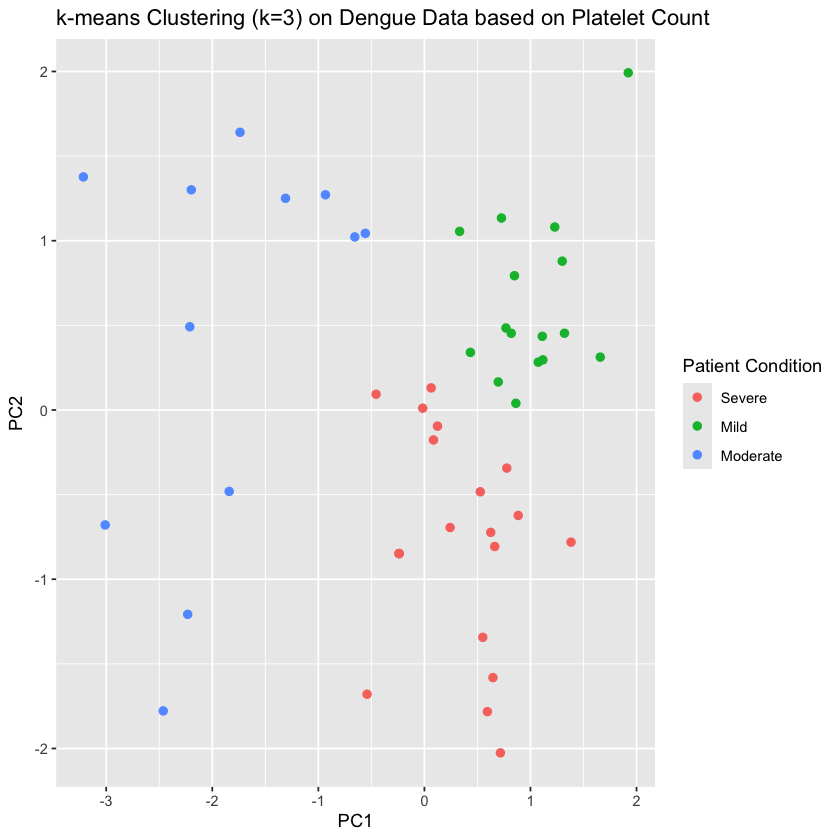

In [57]:
## Kmeans cluster
# Select only numeric columns for clustering
df_dengue_numeric <- dengue_df[, 16:18]  

# Scale data as they are different
df_dengue_scaled <- scale(df_dengue_numeric)

set.seed(123)  # For reproducibility
k <- 3

# Run k-means clustering
kmeans_result <- kmeans(df_dengue_scaled, centers = k, nstart = 20)

# Compare cluster assignments to the ground-truth Species (optional)
table(kmeans_result$cluster, dengue_df$Lowest_Platelets)

# Visualize using the first two principal components
library(ggplot2)

# Use PCA to reduce to 2D for visualization
dengue_pca <- prcomp(df_dengue_scaled, center = FALSE, scale. = FALSE)
pca_data <- as.data.frame(dengue_pca$x)

# Add cluster assignment to the PCA data-frame
pca_data$cluster <- as.factor(kmeans_result$cluster) # Note we use the result from kmeans here

# Assign labels to the factor levels
levels(pca_data$cluster) <- c("Severe", "Mild", "Moderate")

# Plot the clusters in PCA space with color-coded labels
ggplot(pca_data, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 2) +
  labs(title = "k-means Clustering (k=3) on Dengue Data based on Platelet Count", color = "Patient Condition")

In [43]:
# 1) After running k-means:
kmeans_result <- kmeans(df_dengue_scaled, centers = 3, nstart = 20)

# 2) Create a cluster membership column in your original data:
#    Make sure you have the same row order in dengue_df and df_dengue_scaled.
dengue_df$cluster <- factor(kmeans_result$cluster)

# 3) Inspect which samples ended up in each cluster
#    For example, cluster 1
dengue_df %>% 
  dplyr::filter(cluster == 1)

# 4) Visualize "Lowest_Platelets" distributions across the 2 clusters
library(ggplot2)

cluster_PCV <-ggplot(dengue_df, aes(x = cluster, y = Highest_PCV, fill = cluster)) +
  geom_boxplot() +
  labs(title = "Mutations by k-means Cluster (k=3)") +
  theme_minimal()

  cluster_platelets <-ggplot(dengue_df, aes(x = cluster, y = Lowest_Platelets, fill = cluster)) +
  geom_boxplot() +
  labs(title = "Mutations by k-means Cluster (k=3)") +
  theme_minimal()

# 5) You can also do a simple scatter plot (if you have at least 2 numeric columns):
clusterplot_1 <- ggplot(dengue_df, aes(x = Lowest_Platelets, y = Highest_PCV , color = cluster)) +
  geom_point(size = 2) +
  labs(title = "") +
  theme_minimal()

  clusterplot_2 <- ggplot(dengue_df, aes(x = Lowest_WBC, y = Highest_PCV , color = cluster)) +
  geom_point(size = 2) +
  labs(title = "") +
  theme_minimal()

  clusterplot_3 <- ggplot(dengue_df, aes(x = Lowest_WBC, y = Lowest_Platelets , color = cluster)) +
  geom_point(size = 2) +
  labs(title = "") +
  theme_minimal()

  clusterplot_4 <- ggplot(dengue_df, aes(x = Mutations , y = Lowest_Platelets , color = cluster)) +
  geom_point(size = 2) +
  labs(title = "") +
  theme_minimal()

  print(cluster_PCV)
  print(cluster_platelets)
  print(clusterplot_1)
  print(clusterplot_2)
  print(clusterplot_3)
  print(clusterplot_4)

ERROR: Error in eval(expr, envir, enclos): object 'df_dengue_scaled' not found


In [42]:
library(patchwork)

# 2) Combine plots. You can arrange them side by side or in any layout you prefer:
combined_plot <- (cluster_PCV /(clusterplot_1 + clusterplot_2 )) 
   

# 3) Print the combined figure
print(combined_plot)

combined_plot2 <- (cluster_platelets/(clusterplot_3+clusterplot_4))

print(combined_plot2)

ERROR: Error in eval(expr, envir, enclos): object 'cluster_PCV' not found


In [41]:
library(dplyr)
library(ggplot2)
library(rlang)   # for sym() if using !!sym() approach

pair <- c("Lowest_Platelets", "Highest_PCV")  # example pair

df_sub <- dengue_df %>%
  select(all_of(pair))

# Convert to numeric (beware if factor columns have more than 2 levels)
df_sub_num <- data.frame(lapply(df_sub, function(x) {
  # e.g., if x is a factor with DF/DHF, you might explicitly code 0/1, or else everything becomes NA
  as.numeric(as.character(x))
}))

df_sub_scaled <- scale(df_sub_num)

k_res <- kmeans(df_sub_scaled, centers = 3, nstart = 20)
df_sub_num$cluster <- factor(k_res$cluster)

# Extract column names
xcol <- names(df_sub_num)[1]
ycol <- names(df_sub_num)[2]

# Use .data[[xcol]] inside aes()
p <- ggplot(df_sub_num, aes(x = .data[[xcol]], y = .data[[ycol]], color = cluster)) +
  geom_point(size = 2) +
  labs(title = paste("K-means with", xcol, "vs.", ycol), x = xcol, y = ycol) +
  theme_minimal()

print(p)


Attaching package: 'rlang'


The following objects are masked from 'package:purrr':

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice




ERROR: Error in eval(expr, envir, enclos): object 'dengue_df' not found


In [40]:
# Summarize each cluster
   summary_table <- dengue_df %>%
     group_by(cluster) %>%
     summarize(
       count = n(),
       mean_age = mean(Age, na.rm = TRUE),
       sd_age   = sd(Age, na.rm = TRUE),
       # Add other numeric columns or interesting features:
       mean_wbc = mean(Lowest_WBC, na.rm = TRUE),
       mean_platelets = mean(Lowest_Platelets, na.rm =TRUE),
       mean_PCV = mean(Highest_PCV, na.rm =TRUE),
       Mutations= mean (Mutations, na.rm=TRUE)

       
     ) 
     print(summary_table)
     write.csv(summary_table, "/Users/dinukaariyaratne/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PhD USJP/PhD_Thesis/DENV2 paper/cluster_table.csv", row.names = FALSE)

ERROR: Error in eval(expr, envir, enclos): object 'dengue_df' not found


In [39]:
dengue_df$Diagnosis_binary <- ifelse(dengue_df$Diagnosis == "DHF", 1, 0)

model <- glm(Diagnosis_binary ~ NS1.V177A + NS1.F279L, data = dengue_df, family = binomial)

summary(model)


ERROR: Error in eval(expr, envir, enclos): object 'dengue_df' not found


In [38]:
# 1) Specify which columns are mutations
mutation_cols <- 21:58

# 2) Create a function that runs a Wilcoxon rank-sum test for one mutation column
wilcoxon_for_mutation <- function(m_idx, df, outcome_col) {
  # Partition outcome by carriers (1) vs. non-carriers (0)
  outcome_carrier    <- df[[outcome_col]][df[[m_idx]] == 1]
  outcome_noncarrier <- df[[outcome_col]][df[[m_idx]] == 0]
  
  # If there's not enough data in either group, return NA
  if (length(outcome_carrier) < 2 || length(outcome_noncarrier) < 2) {
    return(NA)
  }
  
  # Perform the Wilcoxon rank-sum test
  w_result <- wilcox.test(outcome_carrier, outcome_noncarrier)
  
  # Return the p-value
  return(w_result$p.value)
}

# 3) Apply the function to each mutation column, collecting p-values
pvals <- sapply(mutation_cols, wilcoxon_for_mutation, 
                df = dengue_df, 
                outcome_col = "Lowest_WBC")

# 4) Adjust for multiple comparisons (Benjamini-Hochberg)
pvals_adj <- p.adjust(pvals, method = "BH")

# 5) Create a results data frame
results_df <- data.frame(
  column_index = mutation_cols,
  pval         = pvals,
  pval_BH      = pvals_adj
)

# 6) Inspect the results
print(results_df)

ERROR: Error in eval(expr, envir, enclos): object 'dengue_df' not found


In [37]:
# 1) Define your mutation columns
mutation_cols <- 21:58

# 2) Reuse the wilcoxon_for_mutation function
wilcoxon_for_mutation <- function(m_idx, df, outcome_col) {
  mutation_values <- df[[m_idx]]
  outcome <- df[[outcome_col]]
  
  # Partition outcome by carriers (1) vs. non-carriers (0)
  outcome_carrier    <- outcome[mutation_values == 1]
  outcome_noncarrier <- outcome[mutation_values == 0]
  
  # If there's not enough data in either group, return NA
  if (length(outcome_carrier) < 2 || length(outcome_noncarrier) < 2) {
    return(NA)
  }
  
  # Perform the Wilcoxon rank-sum test
  w_result <- wilcox.test(outcome_carrier, outcome_noncarrier)
  
  return(w_result$p.value)
}

# 3) Run Wilcoxon for each outcome separately

# 3a) For Lowest_WBC:
lowest_wbc_pvals <- sapply(mutation_cols, wilcoxon_for_mutation, 
                           df = dengue_df, outcome_col = "Lowest_WBC")
lowest_wbc_pvals_adj <- p.adjust(lowest_wbc_pvals, method = "BH")

# 3b) For Lowest_Platelets:
lowest_plts_pvals <- sapply(mutation_cols, wilcoxon_for_mutation, 
                            df = dengue_df, outcome_col = "Lowest_Platelets")
lowest_plts_pvals_adj <- p.adjust(lowest_plts_pvals, method = "BH")

# 3c) For Highest_PCV:
highest_pcv_pvals <- sapply(mutation_cols, wilcoxon_for_mutation, 
                            df = dengue_df, outcome_col = "Highest_PCV")
highest_pcv_pvals_adj <- p.adjust(highest_pcv_pvals, method = "BH")

# 4) Combine into one results data frame
results_df <- data.frame(
  column_index          = mutation_cols,
  Lowest_WBC_pval       = lowest_wbc_pvals,
  Lowest_WBC_pval_BH    = lowest_wbc_pvals_adj,
  Lowest_Platelets_pval = lowest_plts_pvals,
  Lowest_Platelets_BH   = lowest_plts_pvals_adj,
  Highest_PCV_pval      = highest_pcv_pvals,
  Highest_PCV_pval_BH   = highest_pcv_pvals_adj
)

print(results_df)

# 7) Print or format the results as a table
print(results_df)
knitr::kable(results_df, caption = "Wilcoxon Test Results")
write.csv(results_df, "/Users/dinukaariyaratne/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PhD USJP/PhD_Thesis/DENV2 paper/my_table.csv", row.names = FALSE)



  

ERROR: Error in eval(expr, envir, enclos): object 'dengue_df' not found


In [ ]:
library(knitr)
   library(kableExtra)

   
   table_html <- kable(summary_table, format = "html", caption = "Summary Table") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed")) %>%
  as.character()  # convert kable object to an HTML string

display_html(table_html)  # Display the HTML table in Jupyter
   

`geom_smooth()` using formula = 'y ~ x'


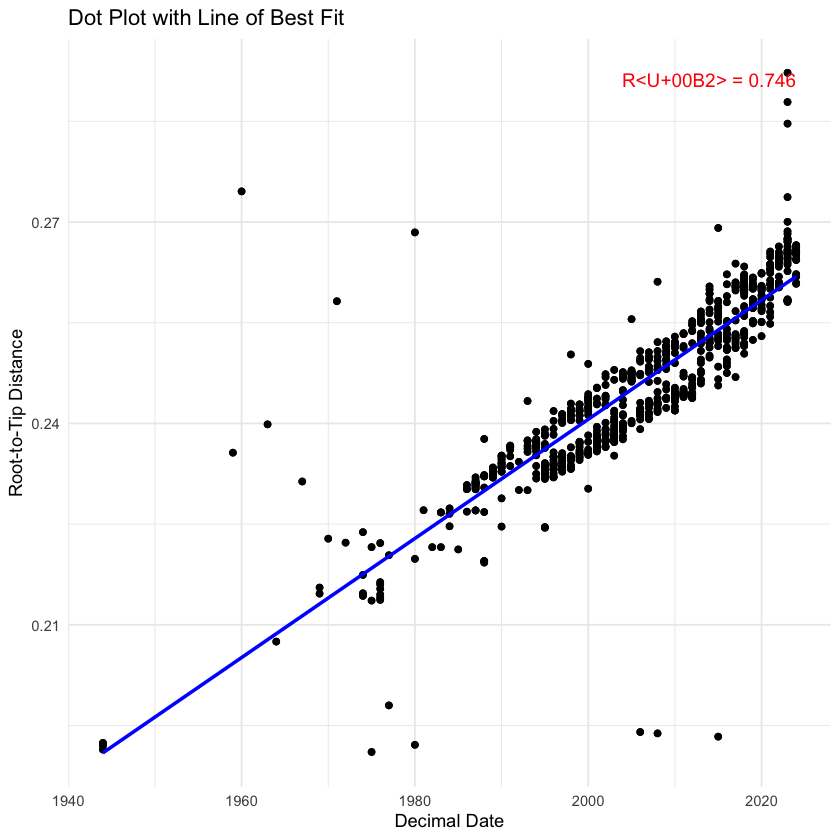

In [ ]:
library(ggplot2)
# Read the CSV file
data_clock <- read.csv("/Users/dinukaariyaratne/Downloads/clockor2 (1).csv")

# Plot using ggplot2
plot_clock <- ggplot(data_clock, aes(x = decimal_date, y = root_to_tip_distance)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Add a line of best fit
  theme_minimal() +  # Use a minimal theme
  labs(
    title = "Dot Plot with Line of Best Fit",
    x = "Decimal Date",
    y = "Root-to-Tip Distance"
  )

# Calculate linear model to get R-squared
model <- lm(root_to_tip_distance ~ decimal_date, data = data_clock)
r_squared <- summary(model)$r.squared

# Annotate the plot with R-squared value
plot_clock + 
  annotate("text", x = max(data_clock$decimal_date), y = max(data_clock$root_to_tip_distance), 
           label = paste("R² =", round(r_squared, 3)), hjust = 1, vjust = 1, 
           size = 4, color = "red")